Análise do Mercado Americano de Planos de Saúde

database: https://www.kaggle.com/datasets/hhs/health-insurance-marketplace/data

In [2]:
# importando as ferramentas/bibliotecas

import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
import seaborn as sns 
import numpy as np
import pandas as pd
import numpy as np
import random as rnd
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import StandardScaler
from numpy import genfromtxt
from scipy.stats import multivariate_normal
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score , average_precision_score
from sklearn.metrics import precision_score, precision_recall_curve
%matplotlib inline

In [3]:
# importando a base de dados de Divisão de Custos

CostShare_df = pd.read_csv("input\BenefitsCostSharing.csv")
CostShare_df.head(n=10)

c:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning:

Columns (3,6,9,10,16,17,18) have mixed types.Specify dtype option on import or set low_memory=False.



,BenefitName,BusinessYear,CoinsInnTier1,CoinsInnTier2,CoinsOutofNet,CopayInnTier1,CopayInnTier2,CopayOutofNet,EHBVarReason,Exclusions,...,LimitUnit,MinimumStay,PlanId,QuantLimitOnSvc,RowNumber,SourceName,StandardComponentId,StateCode,StateCode2,VersionNum
0,Routine Dental Services (Adult),2014,20%,NaN,20%,No Charge,NaN,No Charge,Above EHB,NaN,...,Dollars per Year,NaN,21989AK0010001-00,Yes,68,HIOS,21989AK0010001,AK,AK,6
1,Dental Check-Up for Children,2014,20%,NaN,20%,No Charge,NaN,No Charge,Substantially Equal,NaN,...,Visit(s) per 6 Months,NaN,21989AK0010001-00,Yes,104,HIOS,21989AK0010001,AK,AK,6
2,Basic Dental Care - Child,2014,40%,NaN,40%,No Charge,NaN,No Charge,Substantially Equal,NaN,...,NaN,NaN,21989AK0010001-00,NaN,110,HIOS,21989AK0010001,AK,AK,6
3,Orthodontia - Child,2014,50%,NaN,50%,No Charge,NaN,No Charge,Additional EHB Benefit,NaN,...,NaN,NaN,21989AK0010001-00,NaN,111,HIOS,21989AK0010001,AK,AK,6
4,Major Dental Care - Child,2014,50%,NaN,50%,No Charge,NaN,No Charge,Substantially Equal,NaN,...,NaN,NaN,21989AK0010001-00,NaN,112,HIOS,21989AK0010001,AK,AK,6
5,Basic Dental Care - Adult,2014,40%,NaN,40%,No Charge,NaN,No Charge,Above EHB,NaN,...,Dollars per Year,NaN,21989AK0010001-00,Yes,113,HIOS,21989AK0010001,AK,AK,6
6,Orthodontia - Adult,2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,21989AK0010001-00,NaN,114,HIOS,21989AK0010001,AK,AK,6
7,Major Dental Care - Adult,2014,50%,NaN,50%,No Charge,NaN,No Charge,Above EHB,NaN,...,Dollars per Year,NaN,21989AK0010001-00,Yes,115,HIOS,21989AK0010001,AK,AK,6
8,Accidental Dental,2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,21989AK0010001-00,NaN,118,HIOS,21989AK0010001,AK,AK,6
9,Routine Dental Services (Adult),2014,20%,NaN,20%,No Charge,NaN,No Charge,Above EHB,NaN,...,Dollars per Year,NaN,21989AK0010001-01,Yes,68,HIOS,21989AK0010001,AK,AK,6


In [4]:
# importando a base de dados de Divisão de Custos

CostShare_df = pd.read_csv("input\BenefitsCostSharing.csv")
CostShare_df.head(n=10)

c:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning:

Columns (3,6,9,10,16,17,18) have mixed types.Specify dtype option on import or set low_memory=False.



,BenefitName,BusinessYear,CoinsInnTier1,CoinsInnTier2,CoinsOutofNet,CopayInnTier1,CopayInnTier2,CopayOutofNet,EHBVarReason,Exclusions,...,LimitUnit,MinimumStay,PlanId,QuantLimitOnSvc,RowNumber,SourceName,StandardComponentId,StateCode,StateCode2,VersionNum
0,Routine Dental Services (Adult),2014,20%,NaN,20%,No Charge,NaN,No Charge,Above EHB,NaN,...,Dollars per Year,NaN,21989AK0010001-00,Yes,68,HIOS,21989AK0010001,AK,AK,6
1,Dental Check-Up for Children,2014,20%,NaN,20%,No Charge,NaN,No Charge,Substantially Equal,NaN,...,Visit(s) per 6 Months,NaN,21989AK0010001-00,Yes,104,HIOS,21989AK0010001,AK,AK,6
2,Basic Dental Care - Child,2014,40%,NaN,40%,No Charge,NaN,No Charge,Substantially Equal,NaN,...,NaN,NaN,21989AK0010001-00,NaN,110,HIOS,21989AK0010001,AK,AK,6
3,Orthodontia - Child,2014,50%,NaN,50%,No Charge,NaN,No Charge,Additional EHB Benefit,NaN,...,NaN,NaN,21989AK0010001-00,NaN,111,HIOS,21989AK0010001,AK,AK,6
4,Major Dental Care - Child,2014,50%,NaN,50%,No Charge,NaN,No Charge,Substantially Equal,NaN,...,NaN,NaN,21989AK0010001-00,NaN,112,HIOS,21989AK0010001,AK,AK,6
5,Basic Dental Care - Adult,2014,40%,NaN,40%,No Charge,NaN,No Charge,Above EHB,NaN,...,Dollars per Year,NaN,21989AK0010001-00,Yes,113,HIOS,21989AK0010001,AK,AK,6
6,Orthodontia - Adult,2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,21989AK0010001-00,NaN,114,HIOS,21989AK0010001,AK,AK,6
7,Major Dental Care - Adult,2014,50%,NaN,50%,No Charge,NaN,No Charge,Above EHB,NaN,...,Dollars per Year,NaN,21989AK0010001-00,Yes,115,HIOS,21989AK0010001,AK,AK,6
8,Accidental Dental,2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,21989AK0010001-00,NaN,118,HIOS,21989AK0010001,AK,AK,6
9,Routine Dental Services (Adult),2014,20%,NaN,20%,No Charge,NaN,No Charge,Above EHB,NaN,...,Dollars per Year,NaN,21989AK0010001-01,Yes,68,HIOS,21989AK0010001,AK,AK,6


In [5]:
# preenchendo os valores nulos
CostShare_df = CostShare_df.fillna(np.nan)

# checando os valores nulos
CostShare_df.isnull().sum()

BenefitName                  0
BusinessYear                 0
CoinsInnTier1          1113847
CoinsInnTier2          4571587
CoinsOutofNet          1113847
CopayInnTier1          1113847
CopayInnTier2          4571587
CopayOutofNet          1113849
EHBVarReason           3020737
Exclusions             4572247
Explanation            4075700
ImportDate                   0
IsCovered               215980
IsEHB                  1817362
IsExclFromInnMOOP       983986
IsExclFromOonMOOP       982626
IsStateMandate         4250463
IsSubjToDedTier1       2465877
IsSubjToDedTier2       2466054
IssuerId                     0
IssuerId2                    0
LimitQty               4360725
LimitUnit              4360539
MinimumStay            5031681
PlanId                       0
QuantLimitOnSvc        3264532
RowNumber                    0
SourceName                   0
StandardComponentId          0
StateCode                    0
StateCode2                   0
VersionNum                   0
dtype: i

In [6]:
# checando o numero de registros

print("Total records in file:%d" %CostShare_df.BenefitName.count())
print("Unique benefits present in the file:%d" %CostShare_df.BenefitName.nunique())

Total records in file:5048408
Unique benefits present in the file:861


In [7]:
# Resumo dos dados e Estatisticas

CostShare_df.describe()

,BusinessYear,IssuerId,IssuerId2,LimitQty,MinimumStay,RowNumber,VersionNum
count,5.048408e+06,5.048408e+06,5.048408e+06,687683.000000,16727.000000,5.048408e+06,5.048408e+06
mean,2.015127e+03,5.220360e+04,5.220360e+04,142.399374,47.937048,9.839018e+01,7.637094e+00
std,7.563664e-01,2.592498e+04,2.592498e+04,1723.372817,5.892297,2.177890e+01,3.803627e+00
min,2.014000e+03,1.004600e+04,1.004600e+04,1.000000,5.000000,6.100000e+01,1.000000e+00
25%,2.015000e+03,3.253600e+04,3.253600e+04,1.000000,48.000000,8.000000e+01,5.000000e+00
50%,2.015000e+03,4.839600e+04,4.839600e+04,20.000000,48.000000,9.900000e+01,7.000000e+00
75%,2.016000e+03,7.498000e+04,7.498000e+04,40.000000,48.000000,1.170000e+02,9.000000e+00
max,2.016000e+03,9.996900e+04,9.996900e+04,75000.000000,90.000000,1.560000e+02,2.400000e+01


In [8]:
# Analizando todas as Features de uma vez utilizando a função enumerate

v_features = CostShare_df.iloc[0:32].columns 
for i, cn in enumerate(CostShare_df[v_features]):
    print(i,cn)
    print(CostShare_df[cn].describe())
    print("-"*40)

0 BenefitName
count                 5048408
unique                    861
top       Orthodontia - Adult
freq                    77377
Name: BenefitName, dtype: object
----------------------------------------
1 BusinessYear
count    5.048408e+06
mean     2.015127e+03
std      7.563664e-01
min      2.014000e+03
25%      2.015000e+03
50%      2.015000e+03
75%      2.016000e+03
max      2.016000e+03
Name: BusinessYear, dtype: float64
----------------------------------------
2 CoinsInnTier1
count                              3934561
unique                                 115
top       20% Coinsurance after deductible
freq                                673204
Name: CoinsInnTier1, dtype: object
----------------------------------------
3 CoinsInnTier2
count             476821
unique                37
top       Not Applicable
freq              185524
Name: CoinsInnTier2, dtype: object
----------------------------------------
4 CoinsOutofNet
count     3934561
unique         60
top          100%

In [9]:
# Separando por Ano

CostShare_df[["BusinessYear", "BenefitName"]].groupby("BusinessYear").describe()

BenefitName                                               
                   count unique                              top   freq
BusinessYear                                                           
2014             1164869    496  Routine Dental Services (Adult)  18719
2015             2079286    517              Orthodontia - Adult  31269
2016             1804253    429              Orthodontia - Adult  27389

In [10]:
# Adesão por estado
## Buscando as variaveis intermediarias

CostShare_df[["StateCode","BenefitName"]].groupby('StateCode').count().sort_values("BenefitName")
Unique_State = CostShare_df.StateCode.unique()
benefitarray = []

for state in Unique_State:
    state_benefit =  len(CostShare_df[CostShare_df["StateCode"] == state])    
    benefitarray.append(state_benefit)

C:\Users\gabric83\AppData\Local\Temp/ipykernel_5912/3793453362.py:2: UserWarning:

FixedFormatter should only be used together with FixedLocator



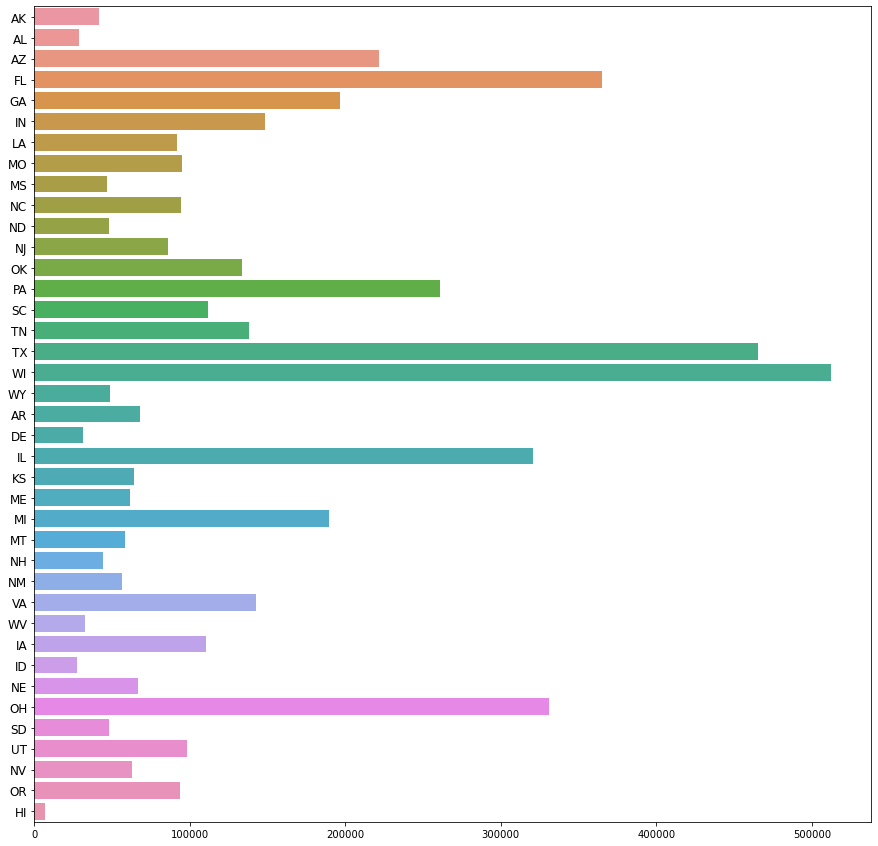

In [11]:
f, ax = plt.subplots(figsize = (15, 15))
ax.set_yticklabels(Unique_State, rotation = "horizontal", fontsize = "large")
g = sns.barplot(y = Unique_State, x = benefitarray)
plt.show()

C:\Users\gabric83\AppData\Local\Temp/ipykernel_5912/4134223281.py:9: UserWarning:

FixedFormatter should only be used together with FixedLocator



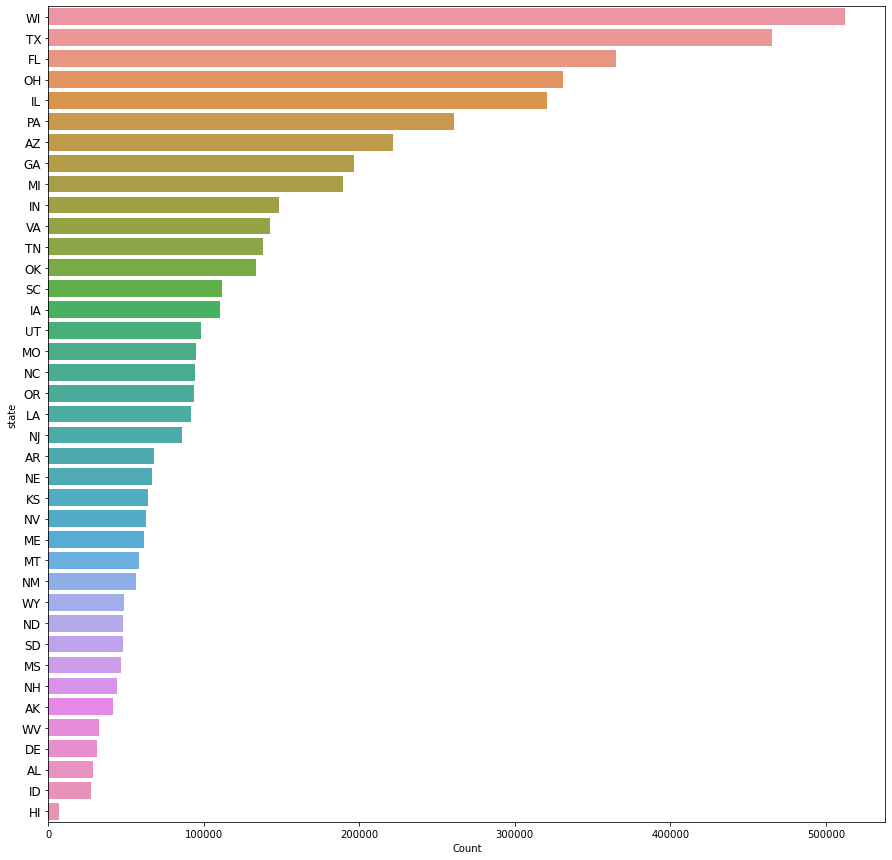

In [12]:
df = pd.DataFrame(
    {'state': Unique_State,
     'Count' : benefitarray
     })

df = df.sort_values("Count", ascending = False).reset_index(drop = True)

f, ax = plt.subplots(figsize=(15, 15)) 
ax.set_yticklabels(df.state, rotation = 'horizontal', fontsize = 'large')
g = sns.barplot(y = df.state, x = df.Count)
plt.show()

In [13]:
# Utilizando o Choropleth plot para visualizar os dados em um mapa de calor interativo

data = dict(type = 'choropleth',
           locations = df['state'],
           locationmode = 'USA-states',
           colorscale = 'Reds',
            text = df['state'],
            marker = dict (line = dict(color = 'rgb(255,255,255)',width=2)),
           z = df['Count'],
           colorbar = {'title':'No of Benefit plans'})

layout = dict(title = 'Benefit plan spread across state',
         geo=dict(scope = 'usa',showlakes = True,lakecolor='rgb(85,173,240)')) 

choromap2 = go.Figure(data = [data],layout=layout)
iplot(choromap2)

In [14]:
# Listar o plano mais consumido pela populaçãode cada estado

CostShare_df[["StateCode", "BenefitName"]].groupby("StateCode").describe()

BenefitName                                              
                count unique                              top  freq
StateCode                                                          
AK              41320     84  Routine Dental Services (Adult)   720
AL              28417    115  Routine Dental Services (Adult)   653
AR              68064     93              Orthodontia - Adult  1077
AZ             221612    195        Major Dental Care - Adult  3345
DE              31370    110              Orthodontia - Adult   602
FL             364742    194              Orthodontia - Child  5130
GA             196579    151  Routine Dental Services (Adult)  2893
HI               6741     76  Routine Dental Services (Adult)   110
IA             110221    104     Dental Check-Up for Children  1727
ID              27313     71     Dental Check-Up for Children   447
IL             320533    157              Orthodontia - Adult  4299
IN             148531    109        Major Dental Care - Adult  2347
KS              64279     82     Dental Check-Up for Children  1087
LA              91816    125  Routine Dental Services (Adult)  1491
ME              61834     99        Basic Dental Care - Child   975
MI             189225    205        Basic Dental Care - Child  3248
MO              95152    127              Orthodontia - Child  1577
MS              46895    104        Basic Dental Care - Adult   725
MT              58132     75        Basic Dental Care - Child  1049
NC              94290     98        Major Dental Care - Adult  1537
ND              48269     77                Accidental Dental   974
NE              66935     90        Major Dental Care - Adult  1238
NH              44305     98        Major Dental Care - Adult   707
NJ              86107    100              Orthodontia - Adult  1357
NM              56669     78              Orthodontia - Adult   828
NV              62743    121     Dental Check-Up for Children   930
OH             331045    193     Dental Check-Up for Children  5092
OK             133639     83        Major Dental Care - Adult  2136
OR              93502    123              Orthodontia - Adult  1344
PA             260866    157  Routine Dental Services (Adult)  4208
SC             111907     85              Orthodontia - Child  1817
SD              47730     79              Orthodontia - Adult   843
TN             138154    129        Basic Dental Care - Adult  2073
TX             465164    180                Accidental Dental  6441
UT              98421    101        Major Dental Care - Adult  1527
VA             142236    145                Accidental Dental  2256
WI             512587    146        Basic Dental Care - Adult  7135
WV              32638     77        Basic Dental Care - Child   625
WY              48425     92     Dental Check-Up for Children   807

In [15]:
# Copay = coparticipação
# Tier 1 = medicamentos genericos(menor coparticipação)
# Tier 2 = medicamentos "originais" escolhidos pelo plano
# Tier 3 = medicamentos "originais" escolhidos por você
# Tier 4 = medicamentos caros, de difícil acesso

In [16]:
# Coparticipação

print("Coinsurance details")
print(CostShare_df.CoinsInnTier1.unique())
print("*"*50)
print(CostShare_df.CoinsInnTier2.unique())
print("*"*50)
print(CostShare_df.CoinsOutofNet.unique())
print("_"*50)
print("_"*50)

Coinsurance details
['20%' '40%' '50%' nan '0%' '30%' '50% Coinsurance after deductible'
 '100% Coinsurance after deductible' '80% Coinsurance after deductible'
 'No Charge' '20% Coinsurance after deductible'
 '40% Coinsurance after deductible' '30% Coinsurance after deductible'
 '60% Coinsurance after deductible' 'No Charge after deductible'
 '45% Coinsurance after deductible' '65% Coinsurance after deductible'
 '100%' '15%' '45%' '35%' '0% Coinsurance after deductible'
 '70% Coinsurance after deductible' '10% Coinsurance after deductible'
 '10%' '35% Coinsurance after deductible'
 '15% Coinsurance after deductible' '5% Coinsurance after deductible' '$0'
 '25%' '65%' '25% Coinsurance after deductible' '5%' '60%' '13%' '18%'
 '18% Coinsurance after deductible' '21%' '55%'
 '55% Coinsurance after deductible' '16% Coinsurance after deductible'
 '9% Coinsurance after deductible' '3% Coinsurance after deductible' '80%'
 '90%' '12%' '33%' '90% Coinsurance after deductible'
 '85% Coinsurance

In [17]:
# Tratando e limpando os dados

CoinsInnTier1 = []
YearBusiness = []
StateCode = []
CoinsInnTier1_real = np.asarray(CostShare_df.CoinsInnTier1)
            
for i, cn in enumerate(CoinsInnTier1_real):
       if (str(cn) == 'nan' or str(cn) == '$0' or str(cn) == 'Not Applicable') :
             continue     
       else :
             if  cn.replace("%","").strip().split(' ')[0] != 'No' :   
                 CoinsInnTier1.append(cn.replace("%","").strip().split(' ')[0])
                 YearBusiness.append(CostShare_df.BusinessYear[i])
                 StateCode.append(CostShare_df.StateCode[i])

In [18]:
# Numero de Coparticipação do Tier1

CoinsInnTier1
CoinsInnTier1 = pd.to_numeric(CoinsInnTier1, errors = "coerce")
Codf = pd.DataFrame(
    {"Coinsurance1": CoinsInnTier1,
     "YearBusiness": YearBusiness,
     "StateCode": StateCode
    })
Codf["Coinsurance1"].value_counts().head(5)

0     872967
20    699602
30    353429
50    221323
10    208094
Name: Coinsurance1, dtype: int64

In [19]:
Codf.groupby("YearBusiness").sum()

,Coinsurance1
YearBusiness,
2014,11196497
2015,18985158
2016,16426782


In [20]:
# Frequencia da Coparticipação

Coinsarray = []

Unique_Coinsurance = Codf.Coinsurance1.unique()
for Coinsurance in Unique_Coinsurance:
    Freq_Coinsurance =  len(Codf[Codf["Coinsurance1"] == Coinsurance])    
    Coinsarray.append(Freq_Coinsurance)
    
Coinsarray = []

Unique_Coinsurance = Codf.Coinsurance1.unique()
for Coinsurance in Unique_Coinsurance:
    Freq_Coinsurance =  len(Codf[Codf["Coinsurance1"] == Coinsurance])    
    Coinsarray.append(Freq_Coinsurance)
    
Coins_df = pd.DataFrame(
    {'Coinsurance': Unique_Coinsurance,
     'Coinsfrequency' : Coinsarray
     })

Coins_df = Coins_df.sort_values("Coinsfrequency", ascending=False).reset_index(drop=True)

Coins_df

,Coinsurance,Coinsfrequency
0,0,872967
1,20,699602
2,30,353429
3,50,221323
4,10,208094
...,...,...
64,47,4
65,29,3
66,56,2
67,43,2


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2211: UserWarning:

`displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2211: UserWarning:

`displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2211: UserWarning:

`displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2211: UserWarning:

`displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2211: UserWarning:

`displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.

c:\ProgramData\Anaconda3\lib\s

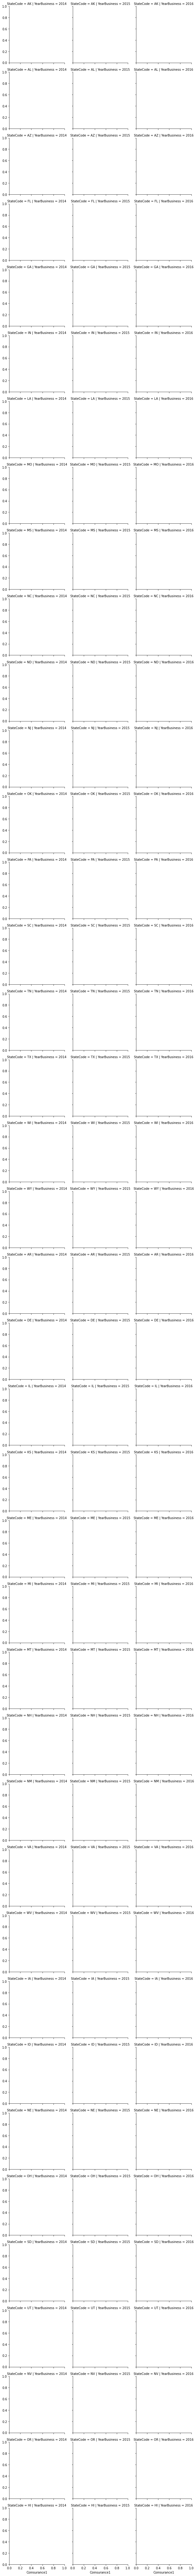

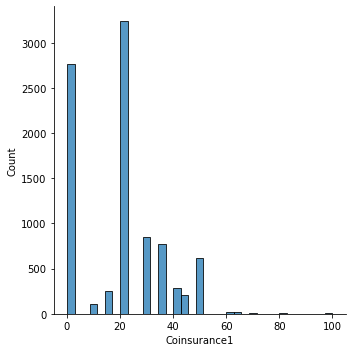

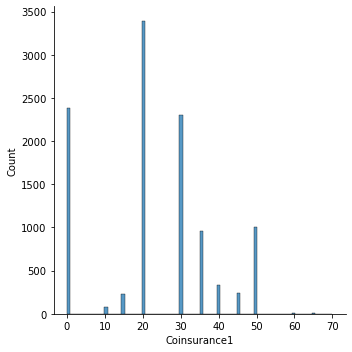

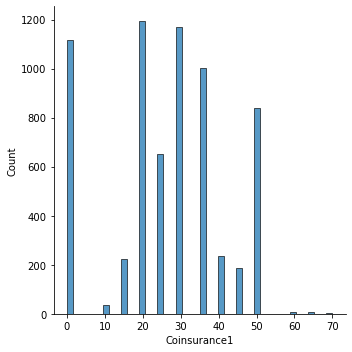

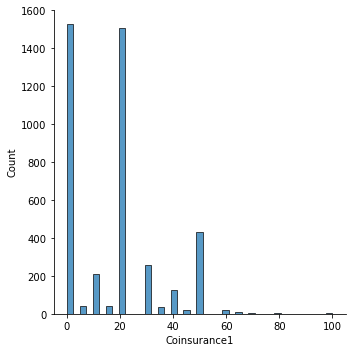

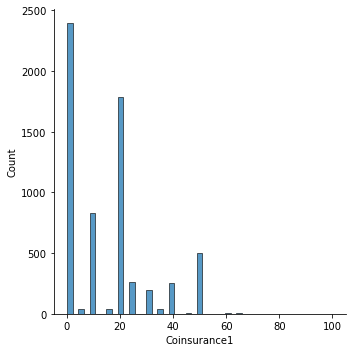

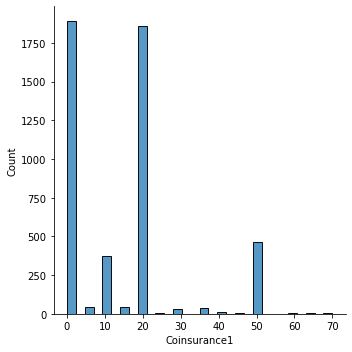

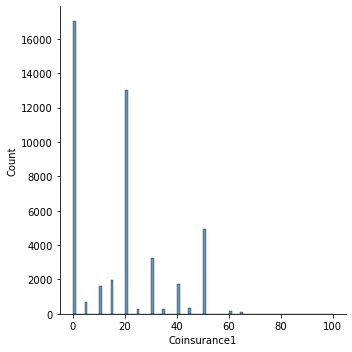

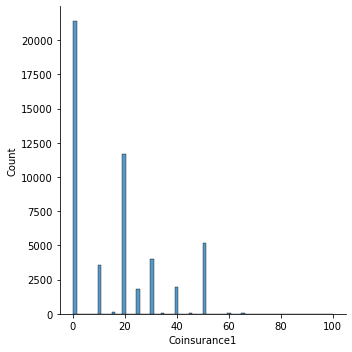

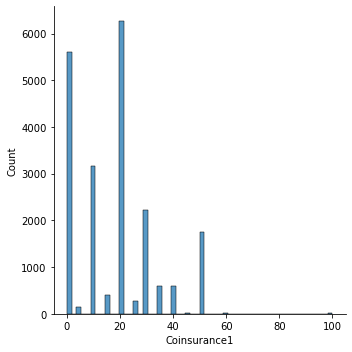

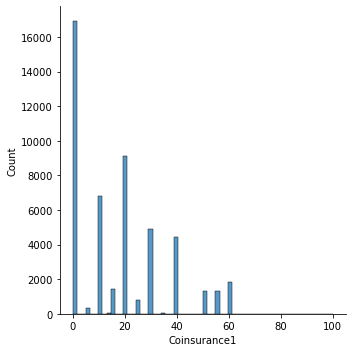

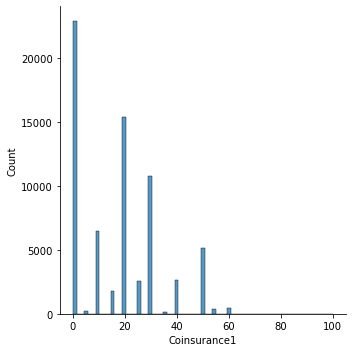

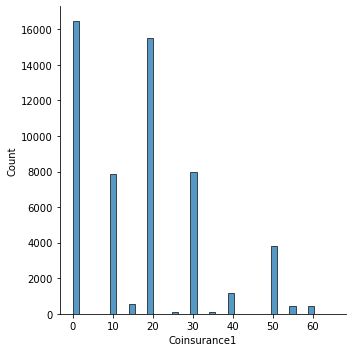

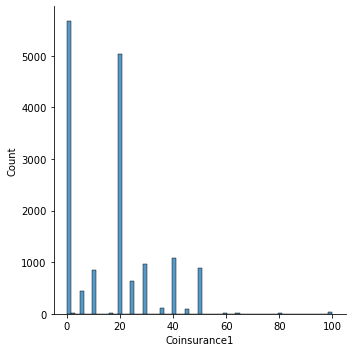

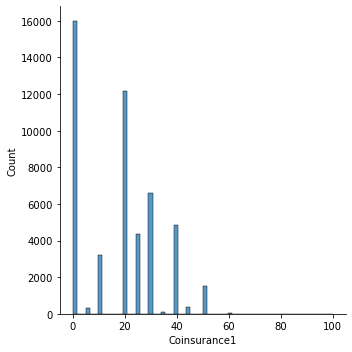

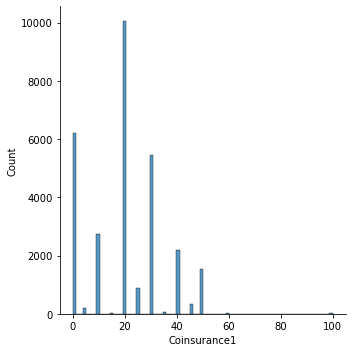

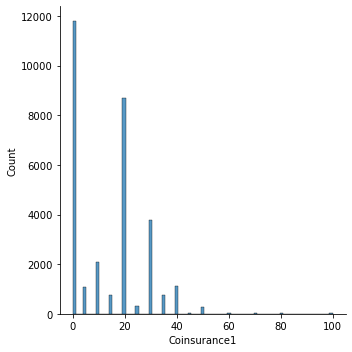

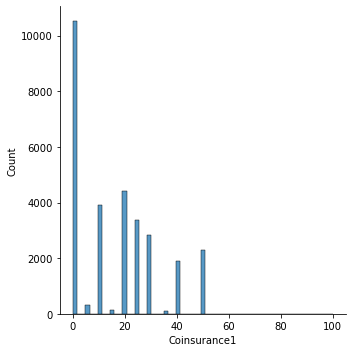

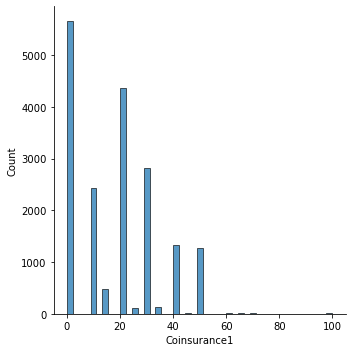

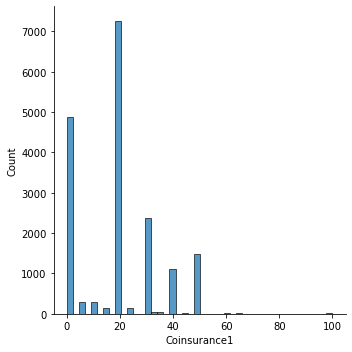

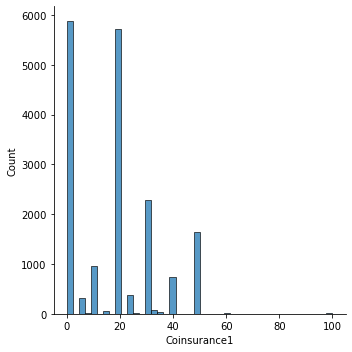

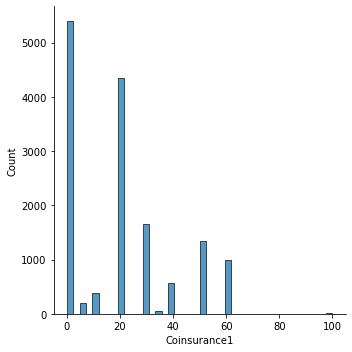

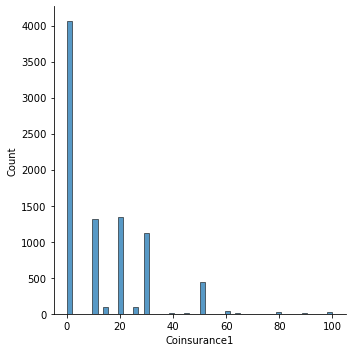

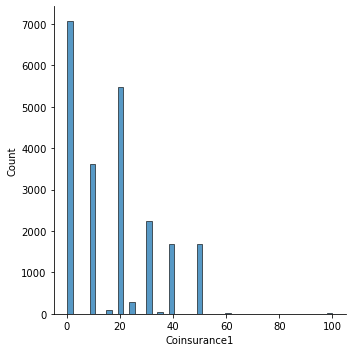

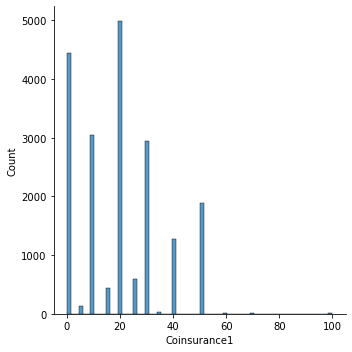

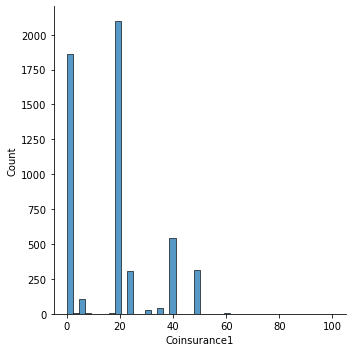

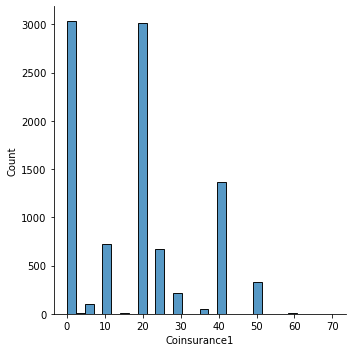

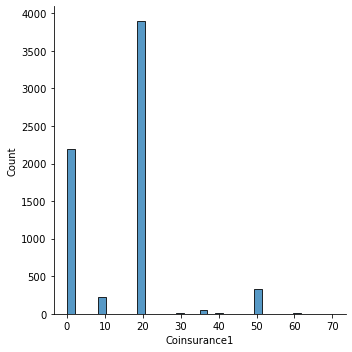

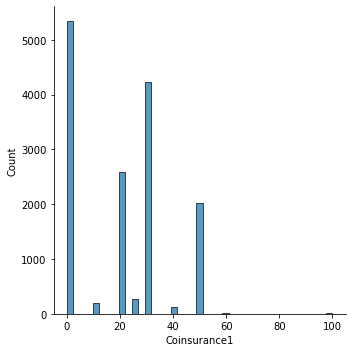

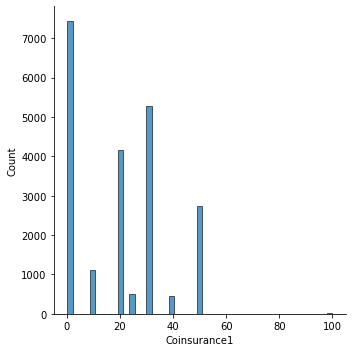

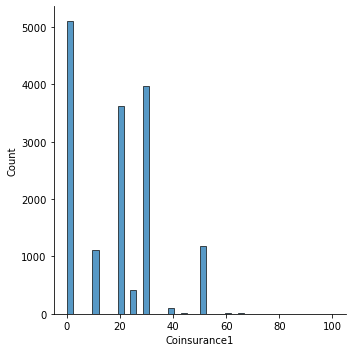

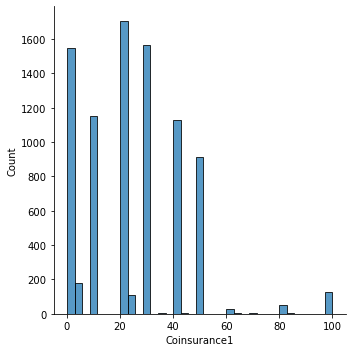

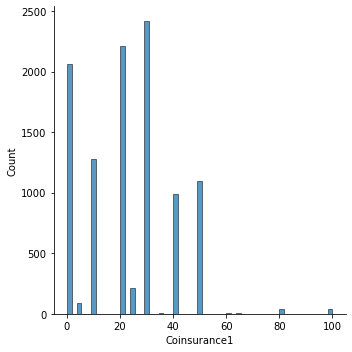

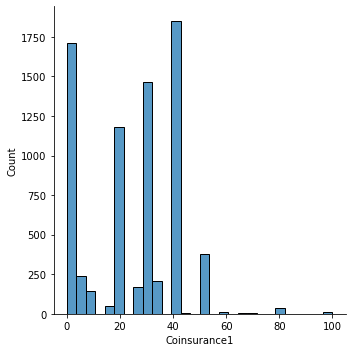

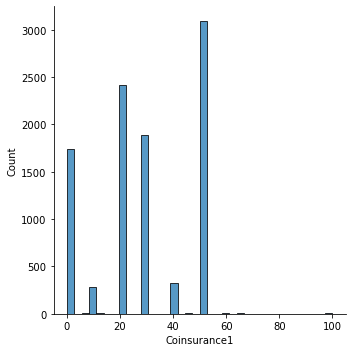

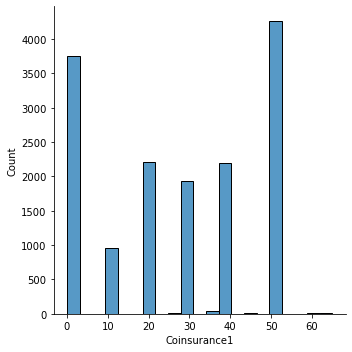

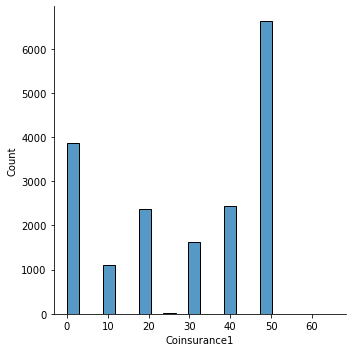

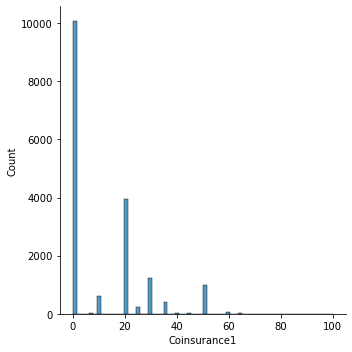

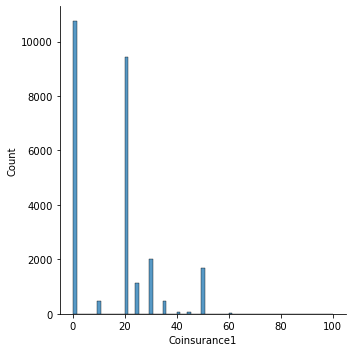

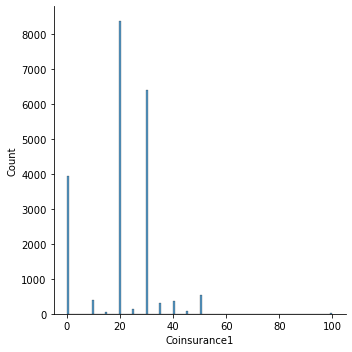

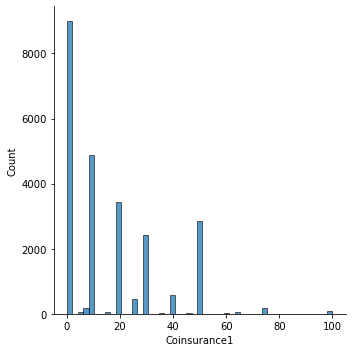

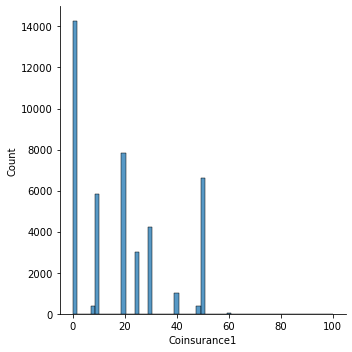

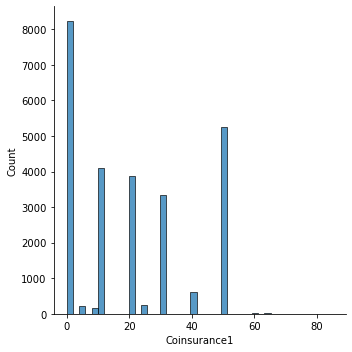

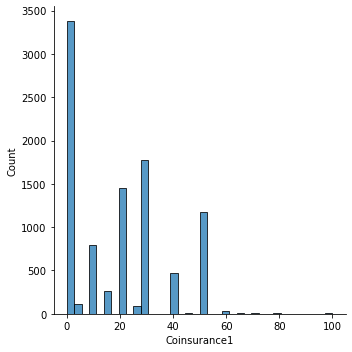

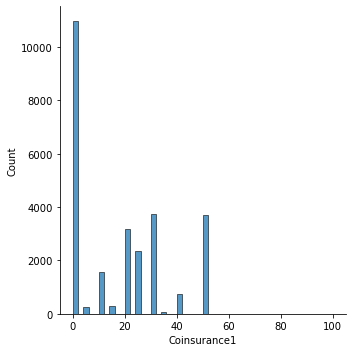

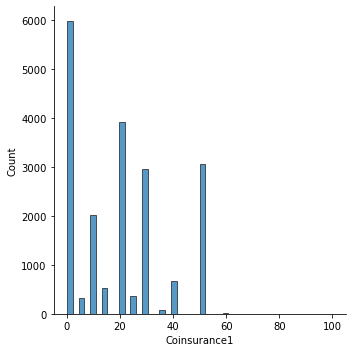

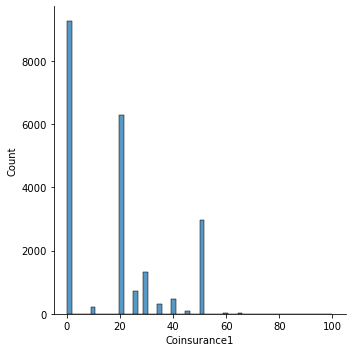

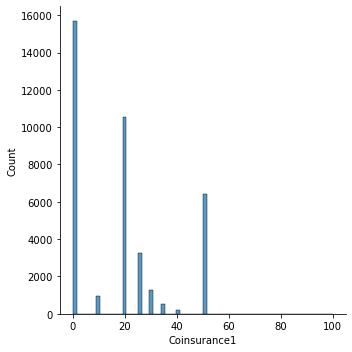

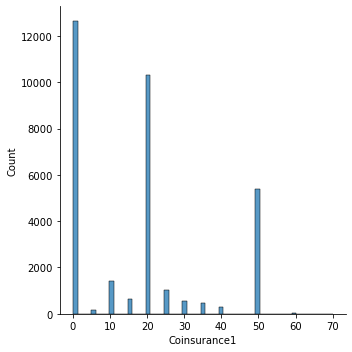

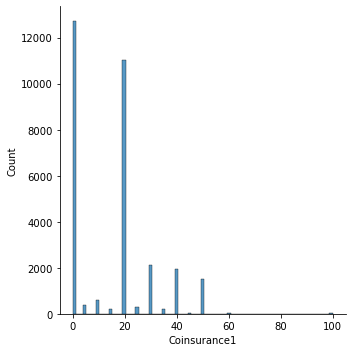

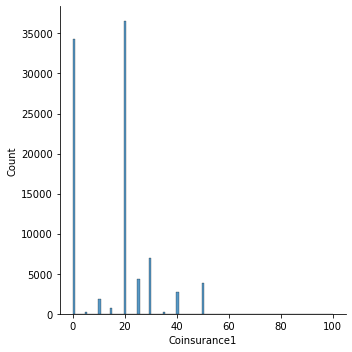

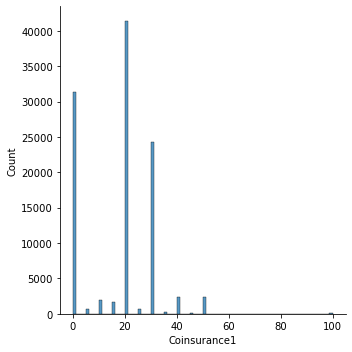

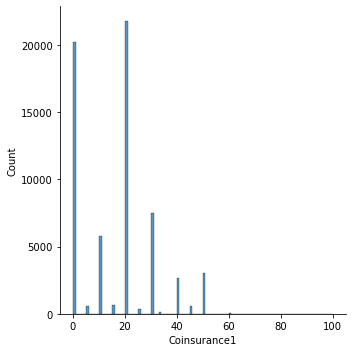

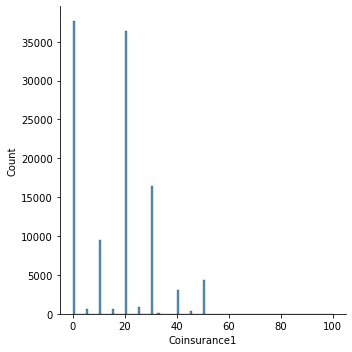

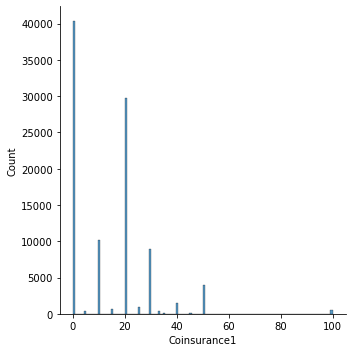

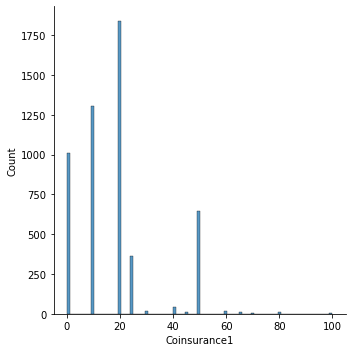

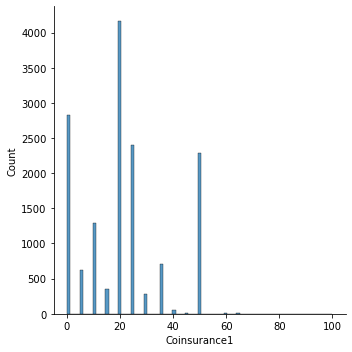

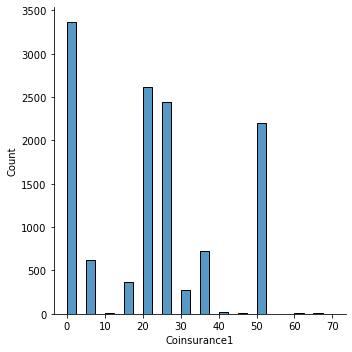

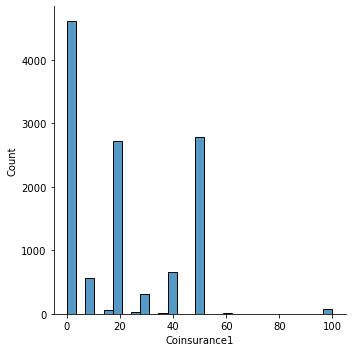

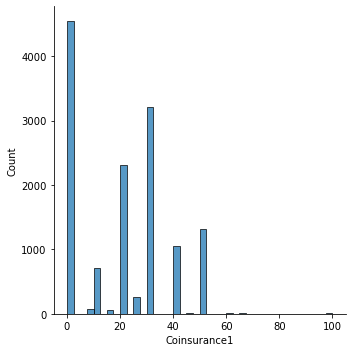

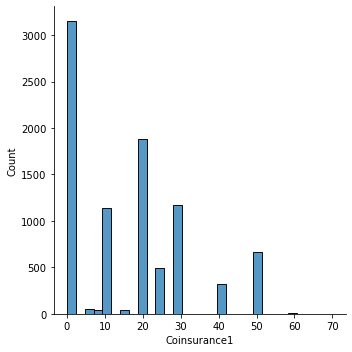

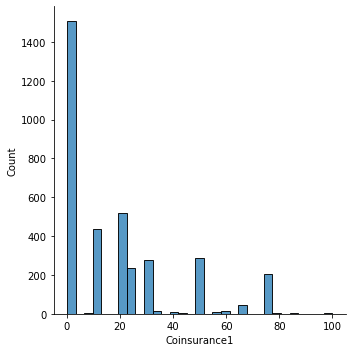

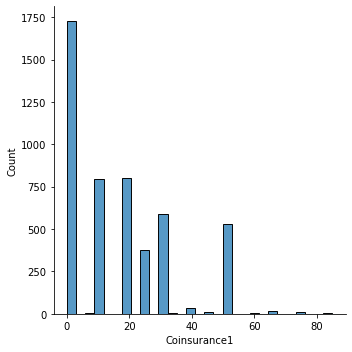

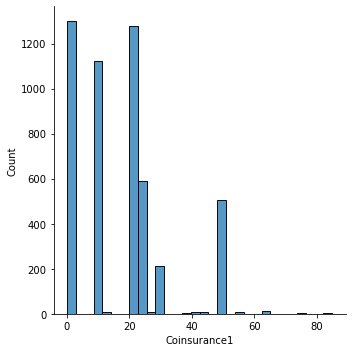

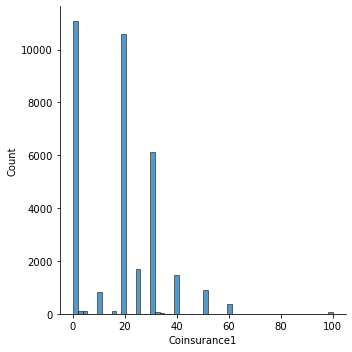

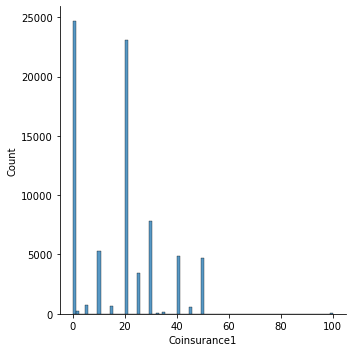

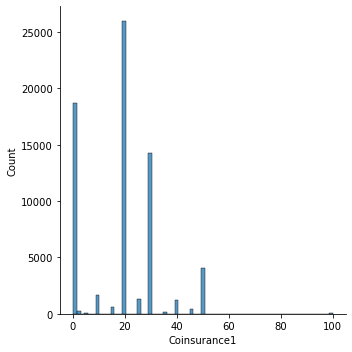

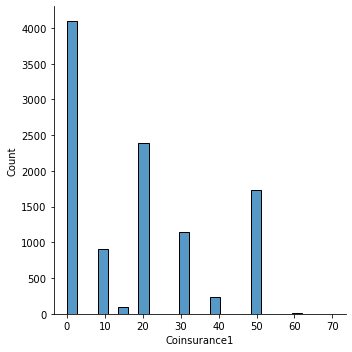

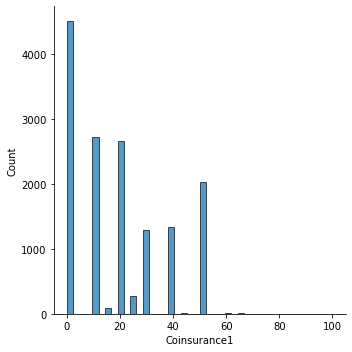

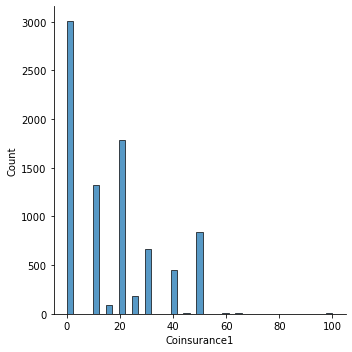

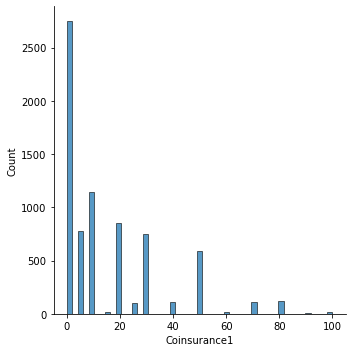

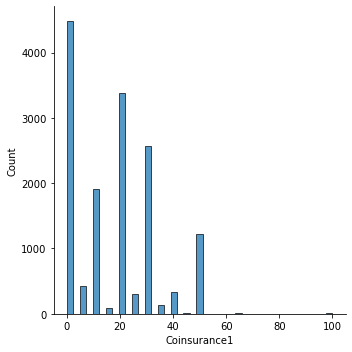

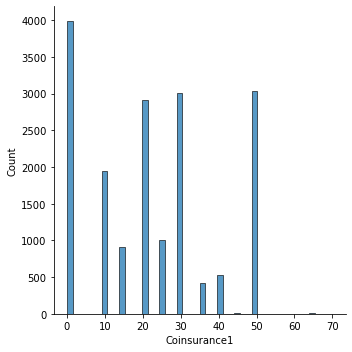

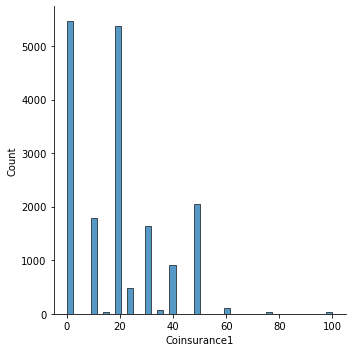

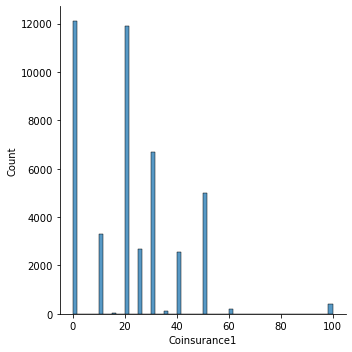

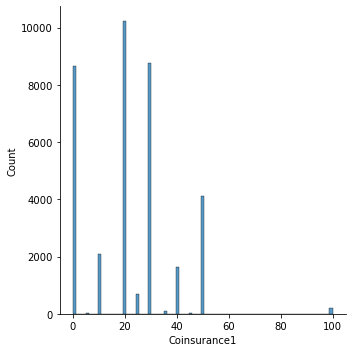

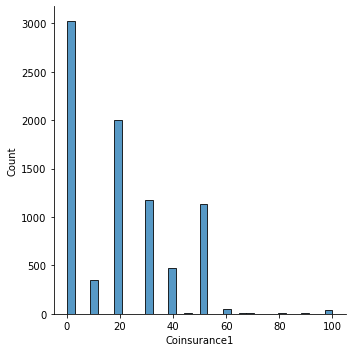

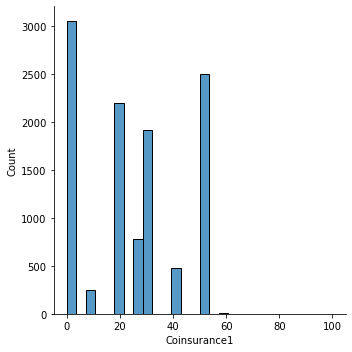

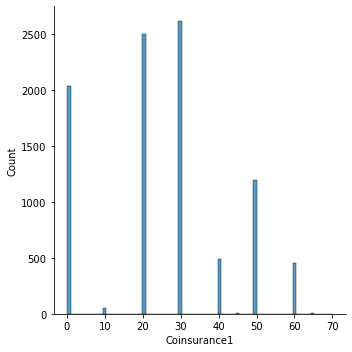

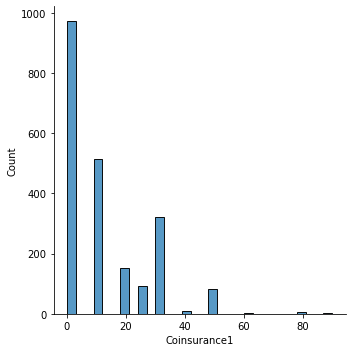

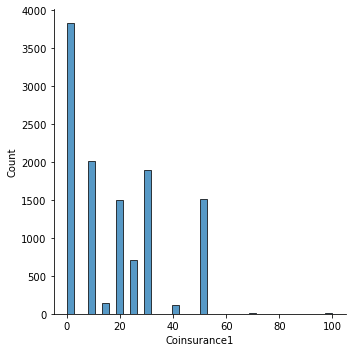

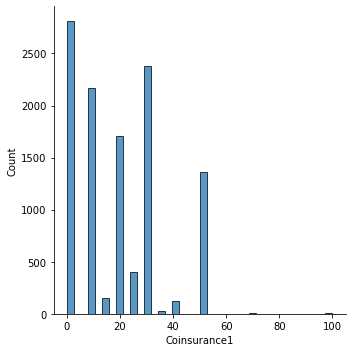

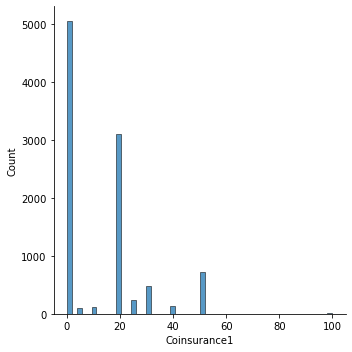

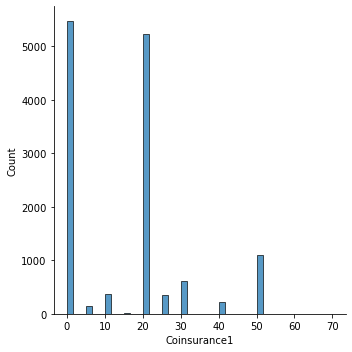

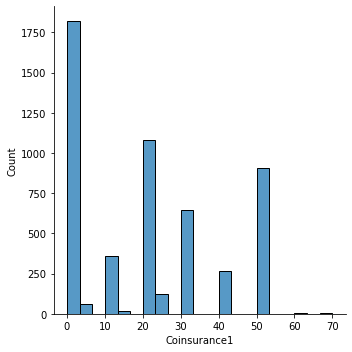

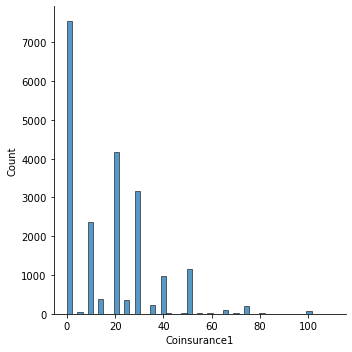

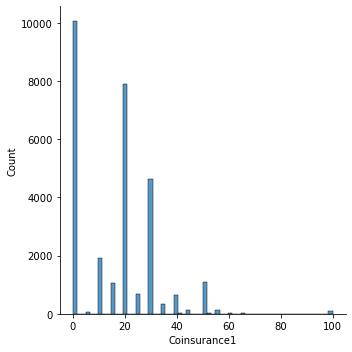

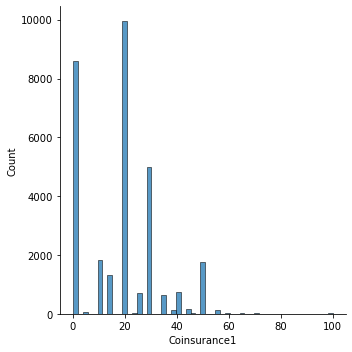

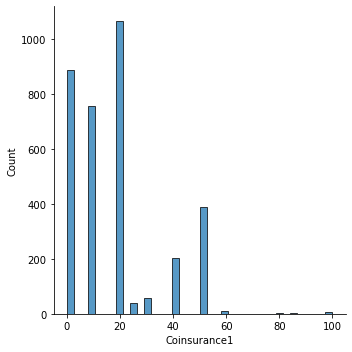

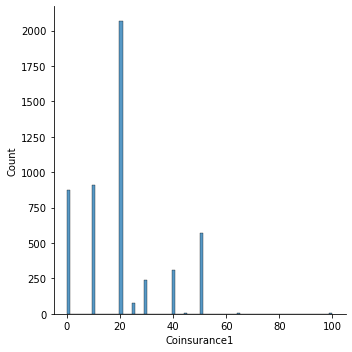

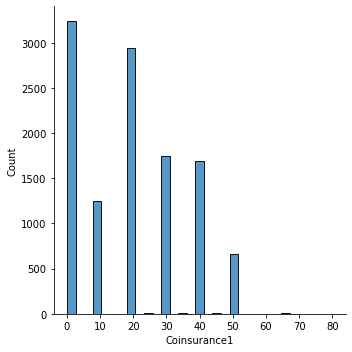

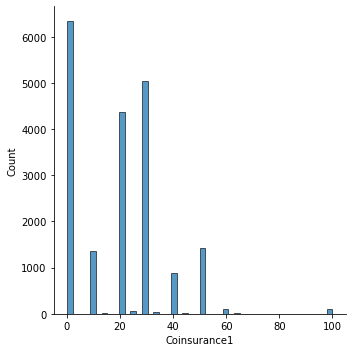

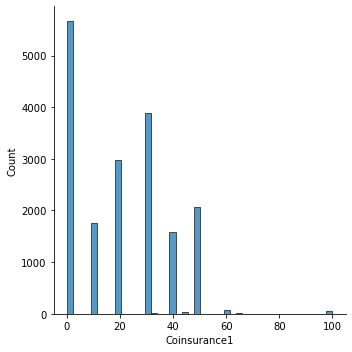

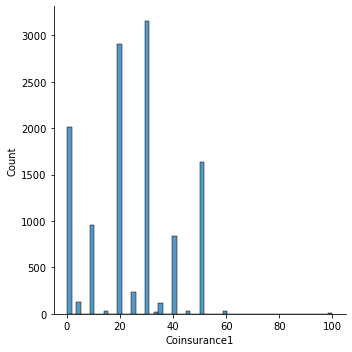

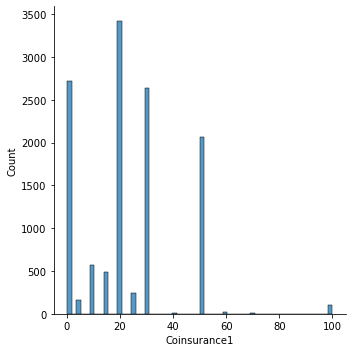

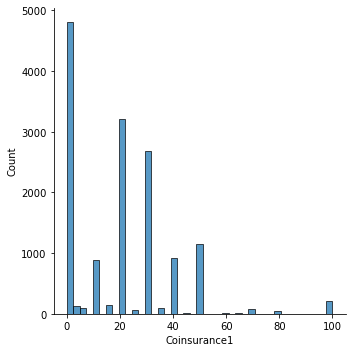

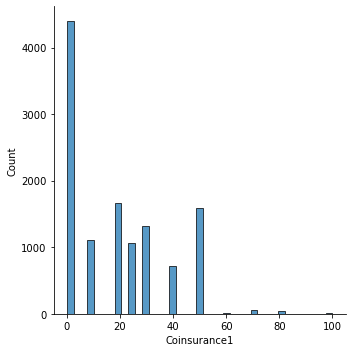

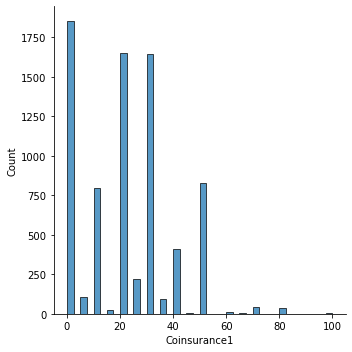

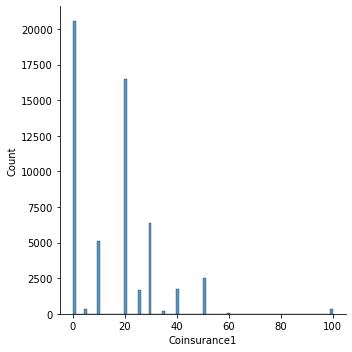

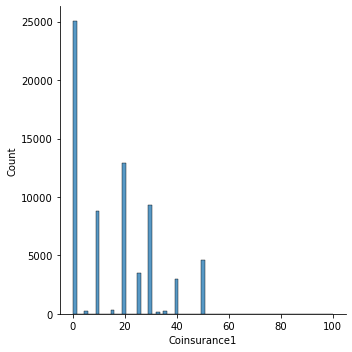

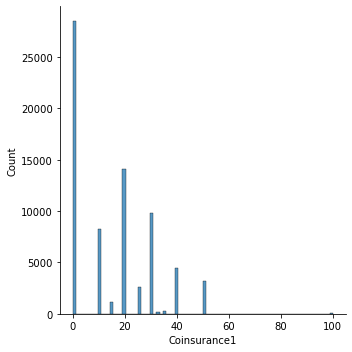

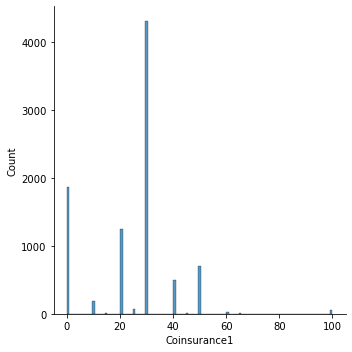

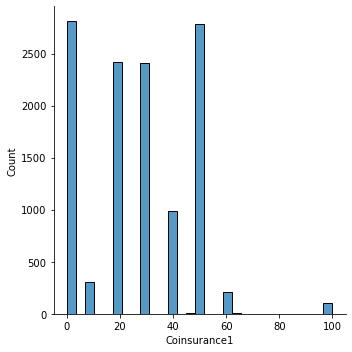

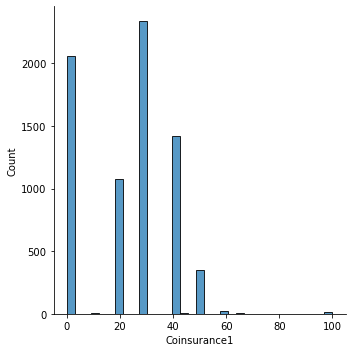

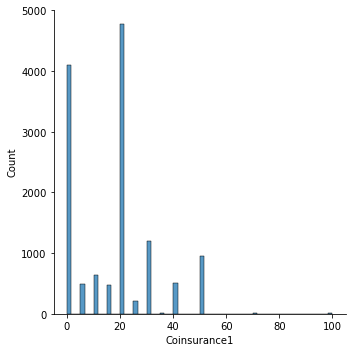

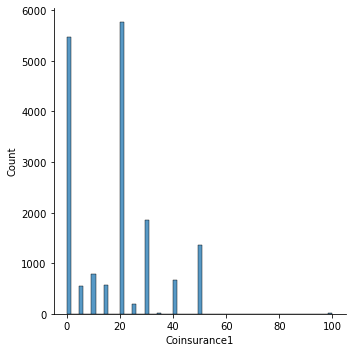

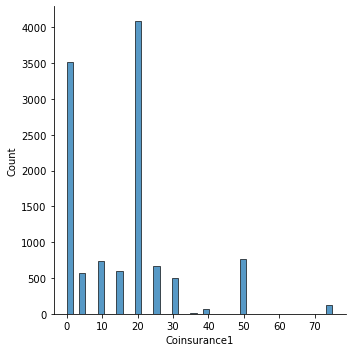

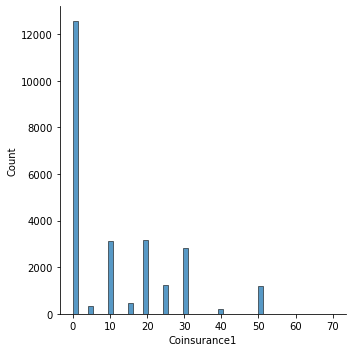

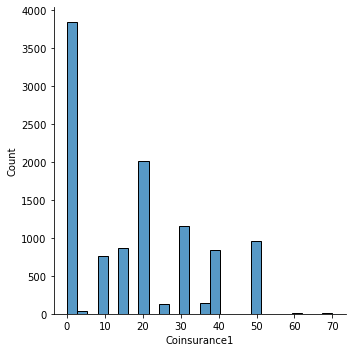

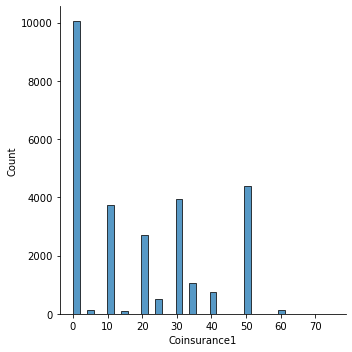

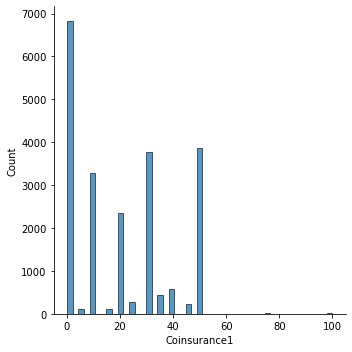

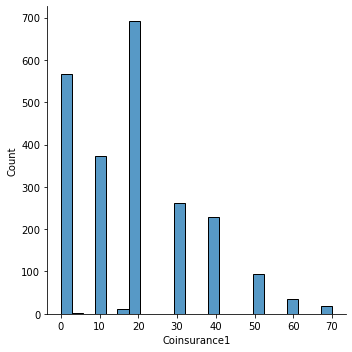

In [21]:
# Distribuição da coparticipação de acordo com os anos

g = sns.FacetGrid(data=Codf,row='StateCode',col='YearBusiness')
g.map(sns.displot,'Coinsurance1')